In [1]:
# Import the required resources

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("train.csv")

In [3]:
# Check top few sample records
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# Check shape of dataframe.  1460 rows & 81 coulmns seen
df.shape

(1460, 81)

In [5]:
# Get more info about dataframe.  Columns with null values are present.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check statistical description of dataframe.
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Review columns with null values & their percentage of null values
# 18 Columns have null values ranging from 100% to 1%

nulldf = round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False)
nulldf.head(50)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageYrBlt      0.06
GarageFinish     0.06
GarageType       0.06
GarageQual       0.06
GarageCond       0.06
BsmtExposure     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtFinType2     0.03
BsmtFinType1     0.03
MasVnrType       0.01
MasVnrArea       0.01
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
LowQualFinSF     0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
GrLivArea        0.00
HeatingQC 

In [8]:
# Let us drop columns with more thane 10% null values

dropsr = round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.10]
dropsr

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [9]:
# Following columns need to be dropped: LotFrontage, Alley, FireplaceQu, PoolQC, Fence, MiscFeature
df = df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [10]:
# Check dataframe shape after dropping columns with null % >10
df.shape

(1460, 75)

In [11]:
#Check remaining categorical columns with null values

dfrem = df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]
dfrem.sort_values(ascending=False)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64

In [12]:
# Change the values of columns in step above from null to "None"

for var in ('MasVnrType','Electrical','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' ):
    df[var]=df[var].fillna('None')
    
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
# Check numerical columns with null values.
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [14]:
# Median imputation for null values in above two columns
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, df['GarageYrBlt'].median())

In [15]:
# As the analysis is being done today in present time, let us derive the age (years passed) from various date variables to today
# These new columns are named prefixing word "Age" to original column name

df['AgeYearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['AgeYearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
df['AgeGarageYrBlt'] = pd.datetime.now().year - df['GarageYrBlt']
df["AgeYrSold"] = pd.datetime.now().year - df['YrSold']

In [16]:
df.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,19,19,19.0,14
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,46,46,46.0,15
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,21,20,21.0,14


In [17]:
# Drop original year columns after creating derived columns (age in years)

df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis= 1, inplace=True)

In [18]:
df.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,19,19,19.0,14
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,46,46,46.0,15
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,21,20,21.0,14


In [19]:
df.shape

(1460, 75)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   LotShape         1460 non-null   object 
 6   LandContour      1460 non-null   object 
 7   Utilities        1460 non-null   object 
 8   LotConfig        1460 non-null   object 
 9   LandSlope        1460 non-null   object 
 10  Neighborhood     1460 non-null   object 
 11  Condition1       1460 non-null   object 
 12  Condition2       1460 non-null   object 
 13  BldgType         1460 non-null   object 
 14  HouseStyle       1460 non-null   object 
 15  OverallQual      1460 non-null   int64  
 16  OverallCond      1460 non-null   int64  
 17  RoofStyle     

In [21]:
# ID column is not significant for analysis hence dropping it.
df.drop('Id',axis=1, inplace=True)

In [22]:
df.dropna(axis='rows', inplace=True)

In [23]:
df.shape

(1460, 74)

In [24]:
# Numerical columns
df[list(df.dtypes[df.dtypes!='object'].index)].columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'AgeYearBuilt', 'AgeYearRemodAdd',
       'AgeGarageYrBlt', 'AgeYrSold'],
      dtype='object')

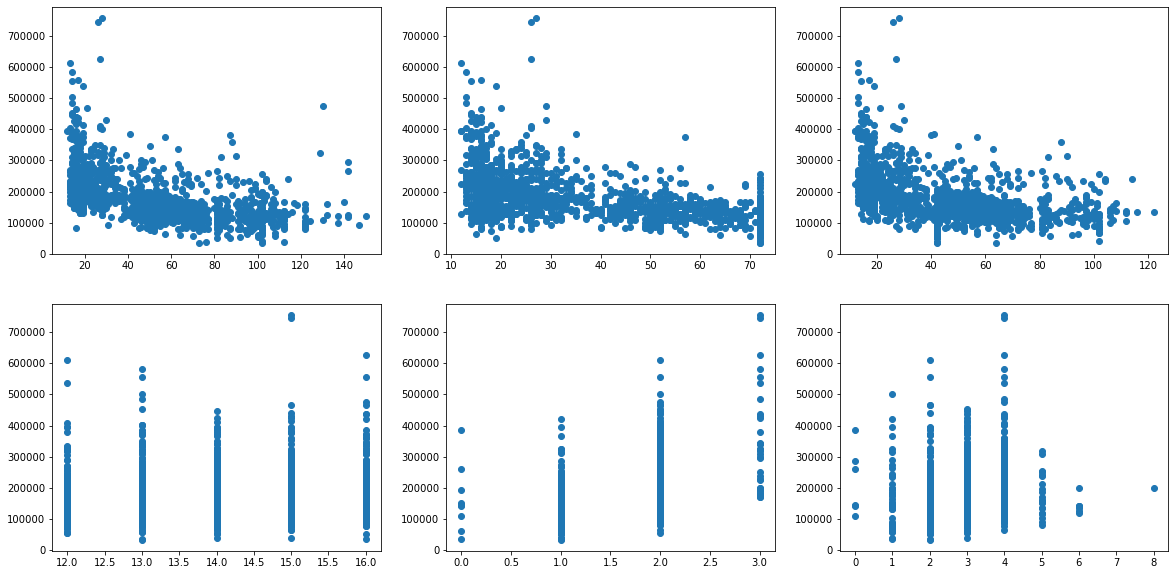

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(df['AgeYearBuilt'],df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df['AgeYearRemodAdd'],df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['AgeGarageYrBlt'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['AgeYrSold'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['FullBath'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['BedroomAbvGr'],df.SalePrice)

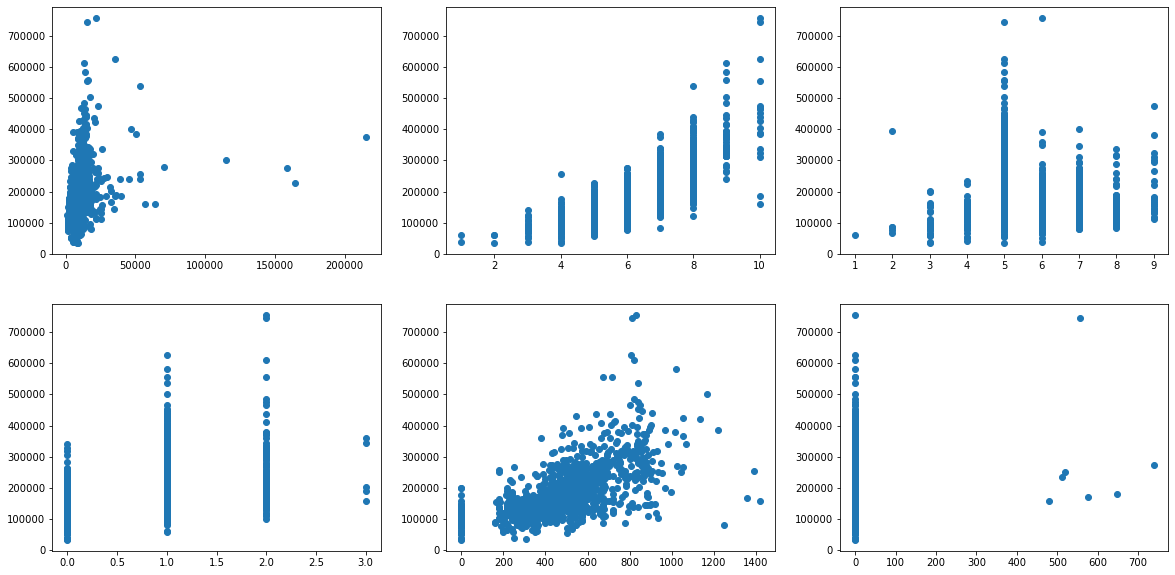

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(df['LotArea'],df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df['OverallQual'],df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['OverallCond'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['Fireplaces'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['PoolArea'],df.SalePrice)

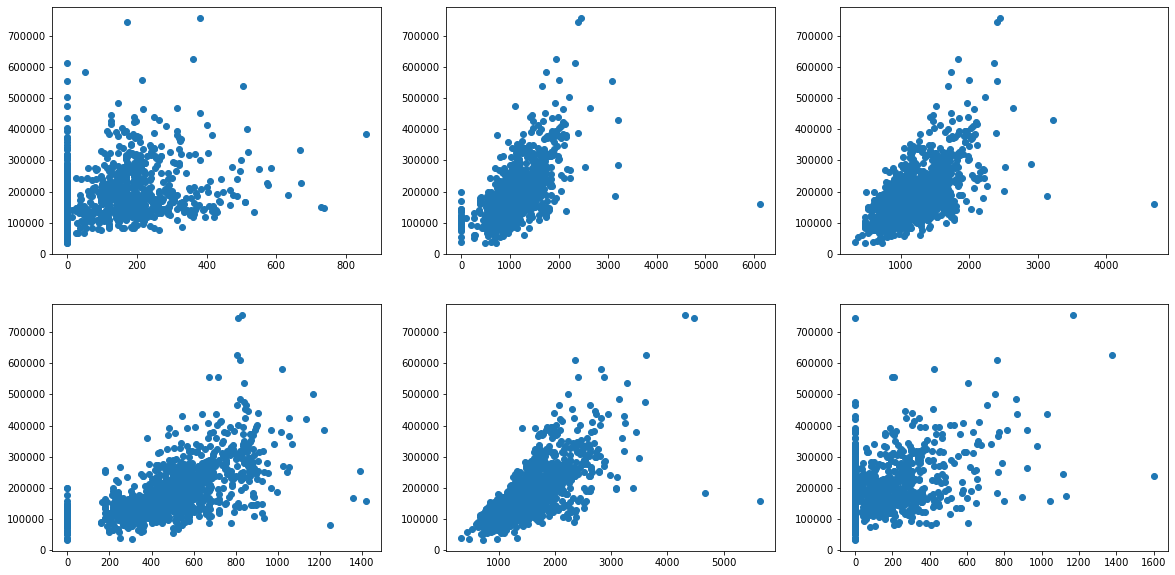

In [27]:
# EDA

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(df['WoodDeckSF'],df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df['TotalBsmtSF'],df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['MasVnrArea'],df.SalePrice)

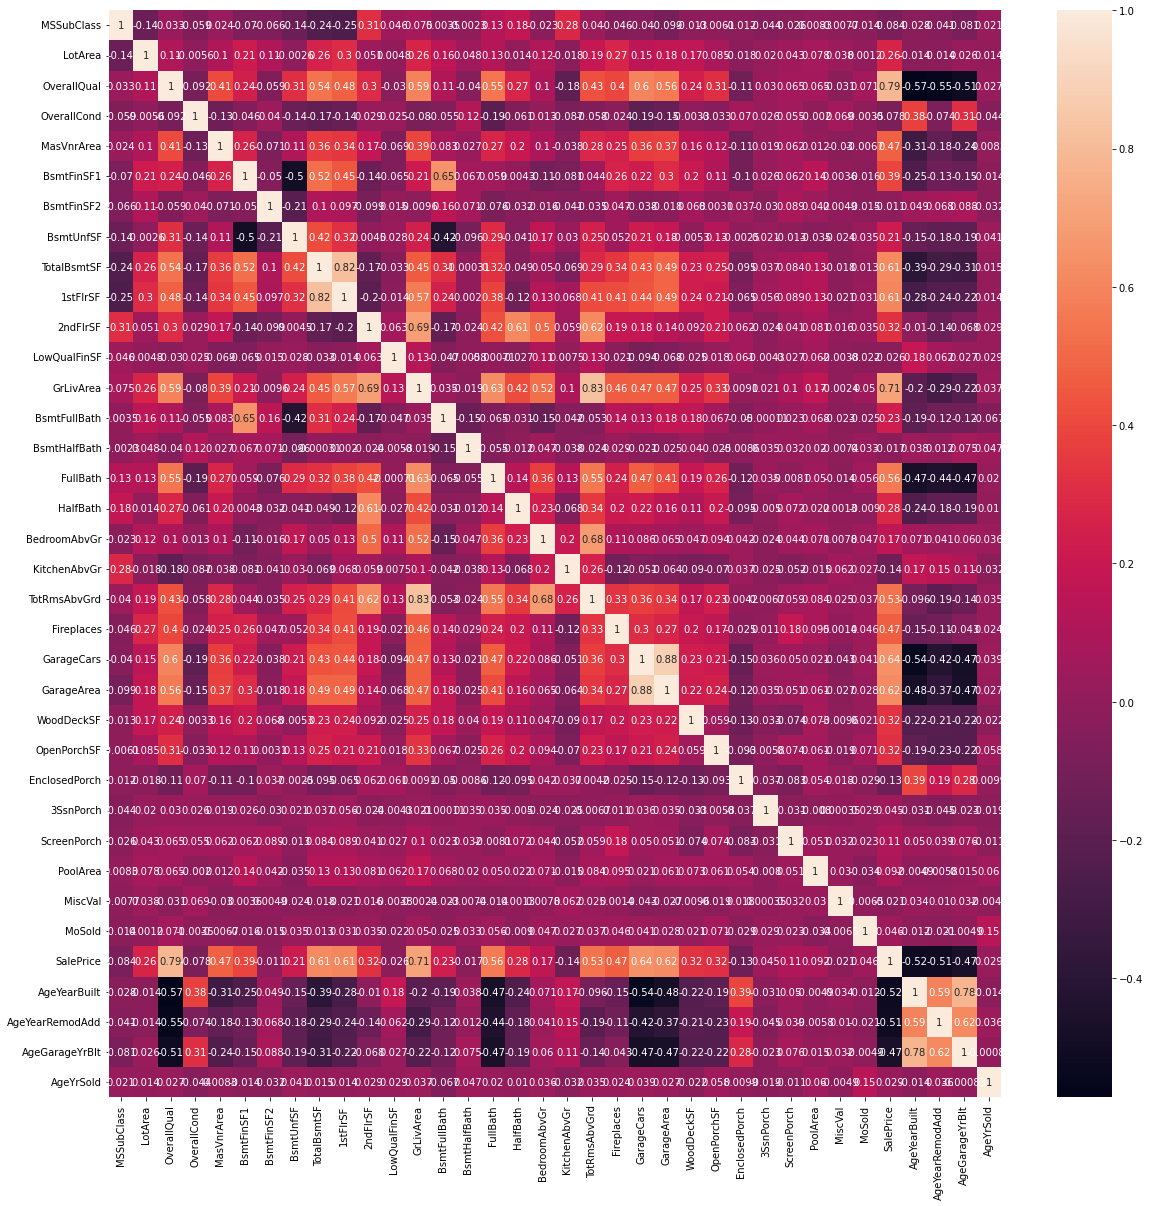

In [28]:
# Correlation map of numeric variables
plt.figure(figsize=(20,20))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [29]:
# Removing outliers
#Step 1.  Select numerical columns as a list
num_df = list(df.dtypes[df.dtypes !='object'].index)
num_df

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'AgeYearBuilt',
 'AgeYearRemodAdd',
 'AgeGarageYrBlt',
 'AgeYrSold']

In [30]:
# Remove outliers 
#Step 2.  Write a function to remove outliers from num_df column names.  Apply it to datframe

def remOut(n):
    for var in num_df:
        q1 = n[var].quantile(.25)
        q3 = n[var].quantile(.99)
        iqr = q3-q1
        n =  n[(n[var] >= (q1-(1.5*iqr))) & (n[var] <= (q3+(1.5*iqr)))] 
    return n

df= remOut(df)
df.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,WD,Normal,208500,19,19,19.0,14
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,WD,Normal,181500,46,46,46.0,15
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,WD,Normal,223500,21,20,21.0,14


In [31]:
df.shape

(1440, 74)

In [32]:
# View categorical columns

df[list(df.dtypes[df.dtypes=='object'].index)].head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
# List of categorical columns
cat_df = list(df.dtypes[df.dtypes =='object'].index)
cat_df

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [34]:
# Creating dummies with dropping first column    
# Adding prefix to dummies
# Concatenating with original dataframe
# Dropping earlier categorical columns after creating the dummies

for col in cat_df:
    dummies = pd.get_dummies(df[col], drop_first = True)
    dummies = dummies.add_prefix(f'{col}_')
    df = pd.concat([df, dummies], axis = 1)
    df.drop([col], axis = 1, inplace = True)
df.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:>

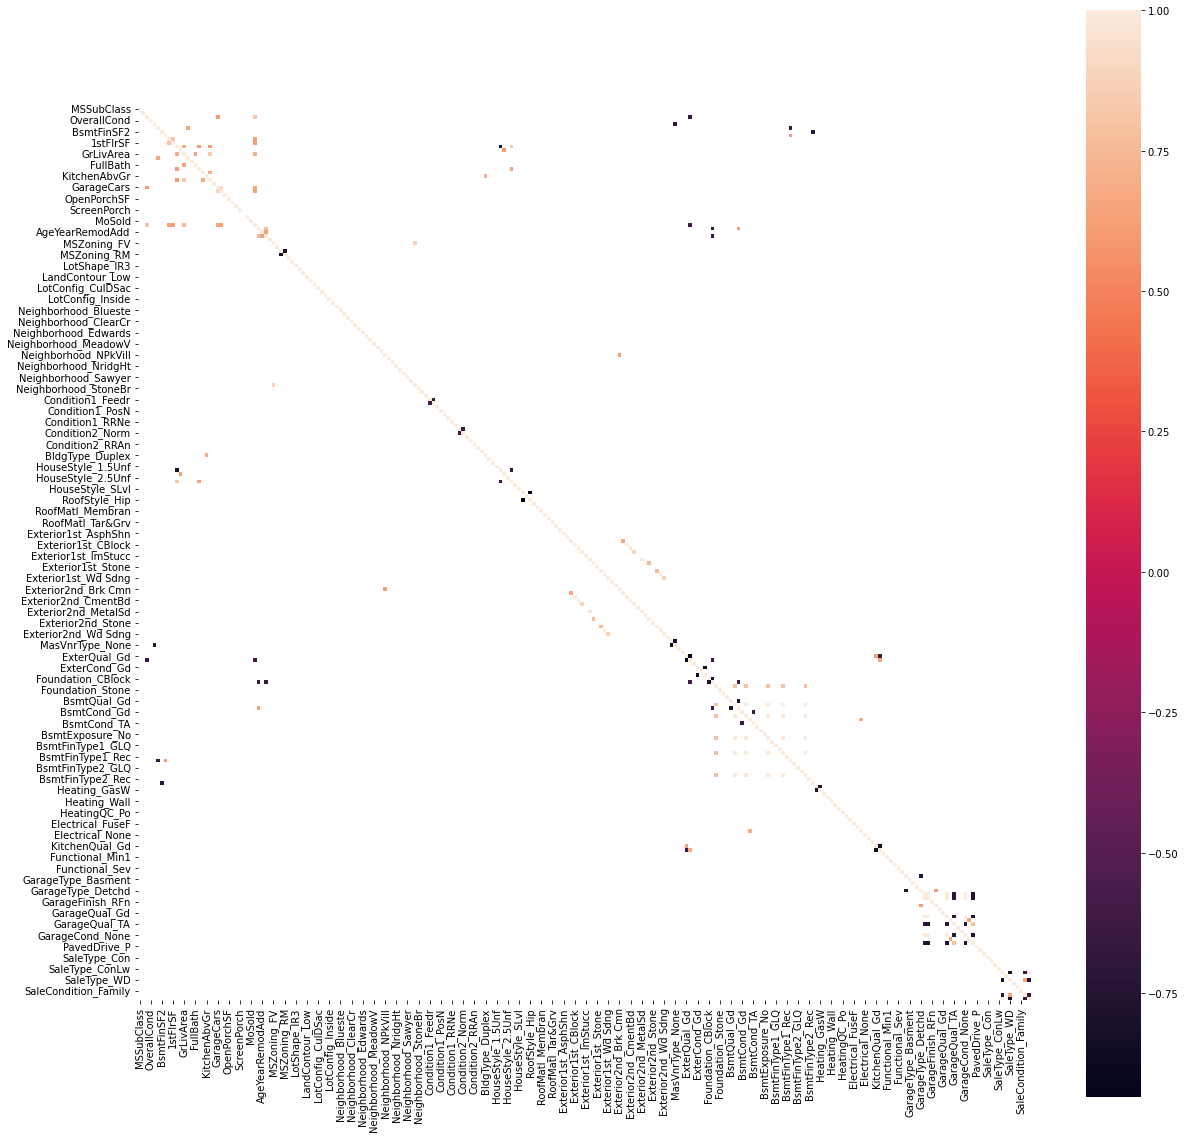

In [35]:
# Plot correlation heatmap.  Too many variables after creating dummies.  
# Hence checking only those correlations where it is >0.6 or <-0.6
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr >0.6) |(corr< -0.6)], square=True)

In [36]:
# Let's use feature selection for eliminating features with collinearity, as there are too many features
# Identifying individually from heatmap is difficult

In [37]:
df.shape

(1440, 240)

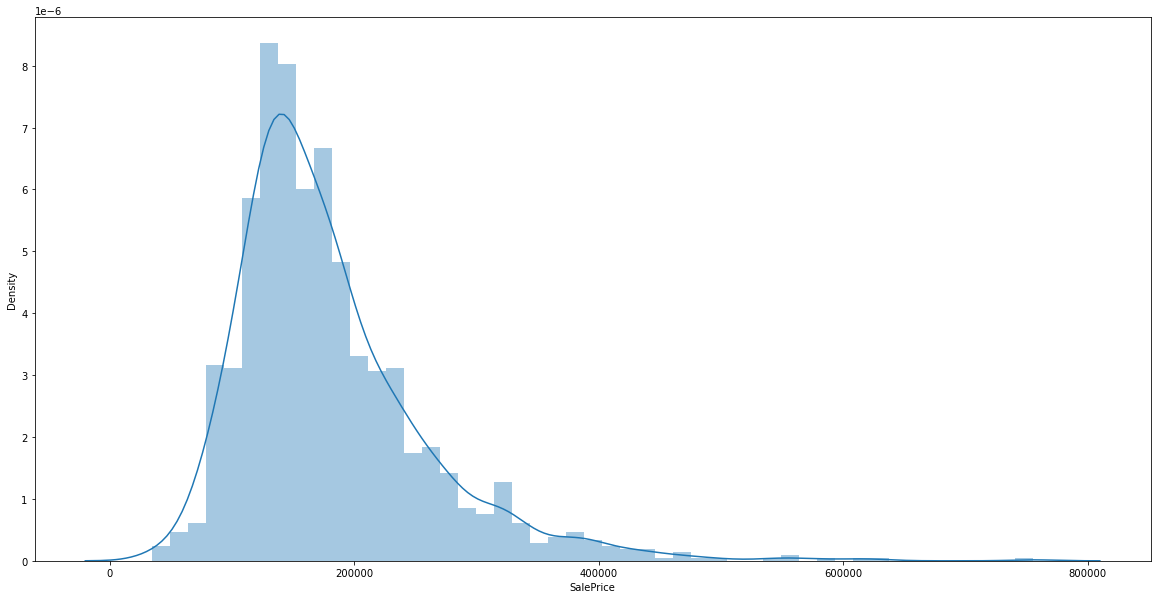

In [38]:
# Check target variable distribution
plt.figure(figsize=(20,10))
sns.distplot(df.SalePrice)
plt.show()

In [39]:
# Distribution is fairly normal.  Right tailed.
# Doing a test train split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [41]:
# Scaling the numerical variables, as they have different scale from sale price
scaler = StandardScaler()
df_train[num_df] = scaler.fit_transform(df_train[num_df])
df_test[num_df] = scaler.transform(df_test[num_df])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

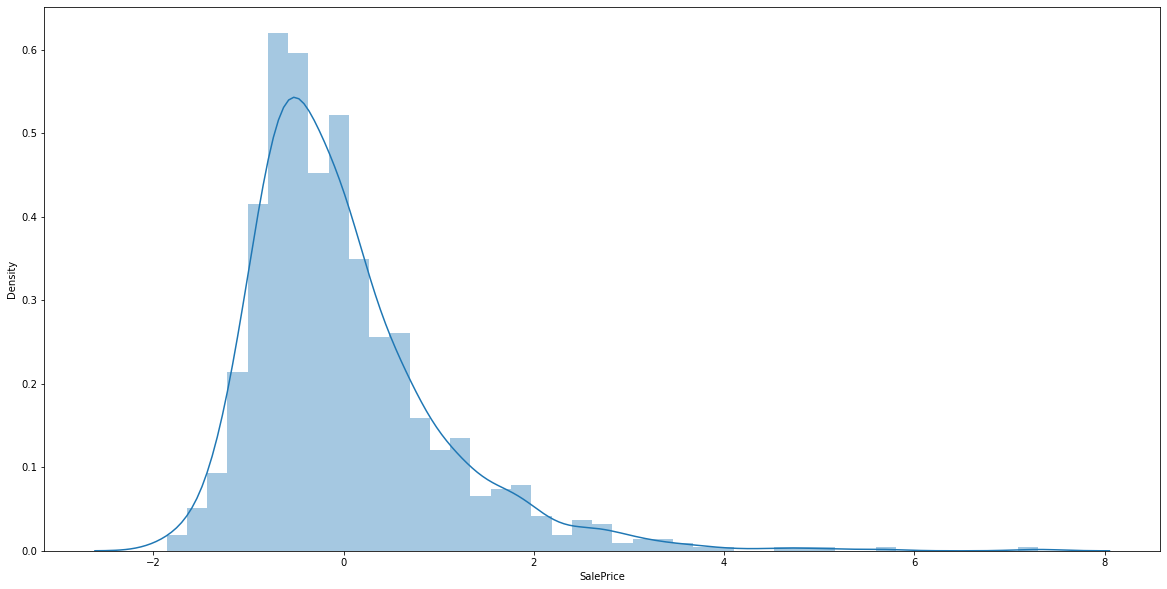

In [42]:
# Check distribution after scaling numerical variables

plt.figure(figsize=(20,10))
sns.distplot(df_train.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

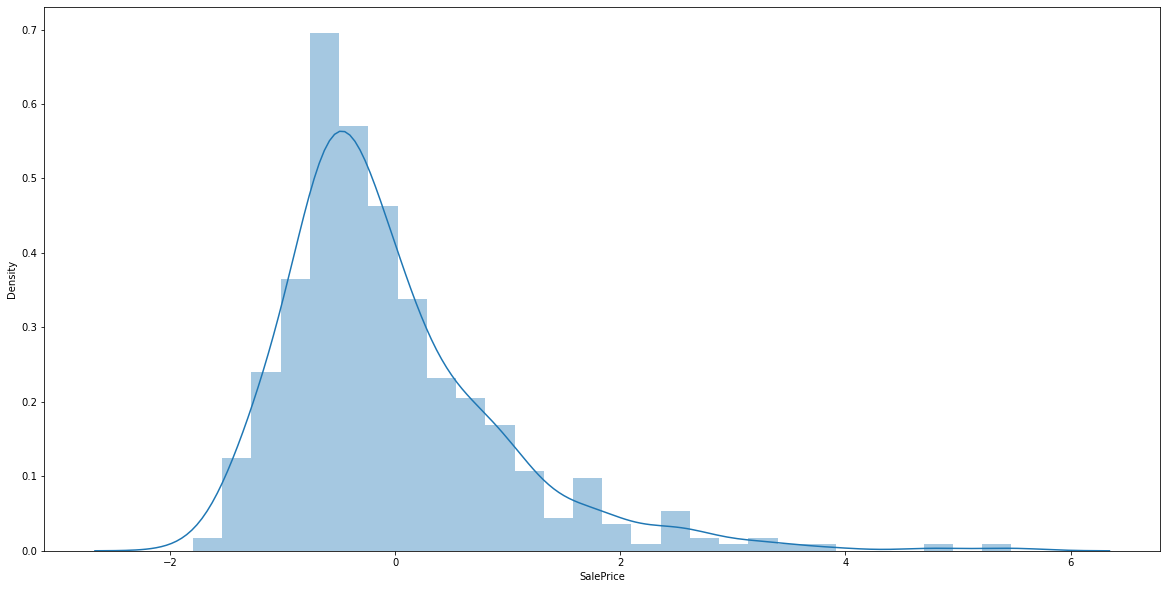

In [44]:
plt.figure(figsize=(20,10))
sns.distplot(df_test.SalePrice)

In [45]:
# Splitting dependent & independent variables for train set
y_train = df_train.pop('SalePrice')
X_train = df_train

In [46]:
# Splitting dependent & independent variables for test set
y_test = df_test.pop('SalePrice')
X_test = df_test

In [47]:
# Not using GridSearchCV as too many variables
# Using RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,100)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [48]:
# 100 variables selected

rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

#### Lasso regression

In [82]:
# Lasso regression.  Print r squared scores.  alpha taken arbitrarily as 0.1 to begin with.  R squared scores are below 0.8.
# R squared values can be improved by changing alpha.  Will do that in next steps.

lm = Lasso(alpha=0.1)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7931171344990593
0.7940065604222462


In [83]:
# Print & view list of coefficients
# Lasso converts many coefficients to zero
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,2) for x in model_parameter]
varcol = df_train.columns
#Insert constant
varcol.insert(0,'Constant')
list(zip(varcol,model_parameter))

[('MSSubClass', -0.0),
 ('LotArea', 0.36),
 ('OverallQual', 0.0),
 ('OverallCond', 0.09),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.09),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', 0.3),
 ('LowQualFinSF', 0.13),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', -0.04),
 ('BsmtHalfBath', 0.0),
 ('FullBath', -0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0),
 ('GarageCars', 0.0),
 ('GarageArea', -0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', -0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('AgeYearBuilt', 0.0),
 ('AgeYearRemodAdd', 0.0),
 ('AgeGarageYrBlt', -0.0),
 ('AgeYrSold', 0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.0),
 ('LandCon

In [84]:
# I used 0.1 as alpha value to begin with.  Now Using GridSearchCv to find optimum value of alpha.  Providing multiple values to check

varf = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

modL = Lasso()

model_a = GridSearchCV(estimator = modL, param_grid=hyper_param, scoring='r2', cv=varf, verbose=1, return_train_score=True)

model_a.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [85]:
# View results as a dataframe

cv_result_A = pd.DataFrame(model_a.cv_results_)
cv_result_A['param_alpha'] = cv_result_A['param_alpha'].astype('float32')
cv_result_A.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020138,0.006624,0.001732,0.001801,0.0001,{'alpha': 0.0001},0.923552,0.455362,0.910501,0.916200,...,0.928507,0.927712,0.930108,0.929075,0.930152,0.929190,0.925344,0.930545,0.928662,0.001484
1,0.021621,0.006138,0.001616,0.002344,0.0010,{'alpha': 0.001},0.924070,0.456578,0.903706,0.920301,...,0.920793,0.920442,0.920701,0.921086,0.922633,0.921459,0.917553,0.922398,0.920918,0.001451
2,0.009490,0.000954,0.000611,0.000934,0.0100,{'alpha': 0.01},0.882318,0.444330,0.840807,0.909310,...,0.851986,0.847026,0.848683,0.849667,0.852135,0.847883,0.846477,0.853924,0.852865,0.008927
3,0.004531,0.003915,0.001004,0.003012,0.0500,{'alpha': 0.05},0.854674,0.499433,0.811024,0.868045,...,0.809339,0.803229,0.808855,0.811611,0.807447,0.805986,0.800550,0.811913,0.810020,0.008298
4,0.006649,0.002264,0.002373,0.000931,0.1000,{'alpha': 0.1},0.849326,0.552234,0.796670,0.851940,...,0.792564,0.787042,0.791068,0.795074,0.790178,0.789835,0.783955,0.795324,0.793521,0.008520


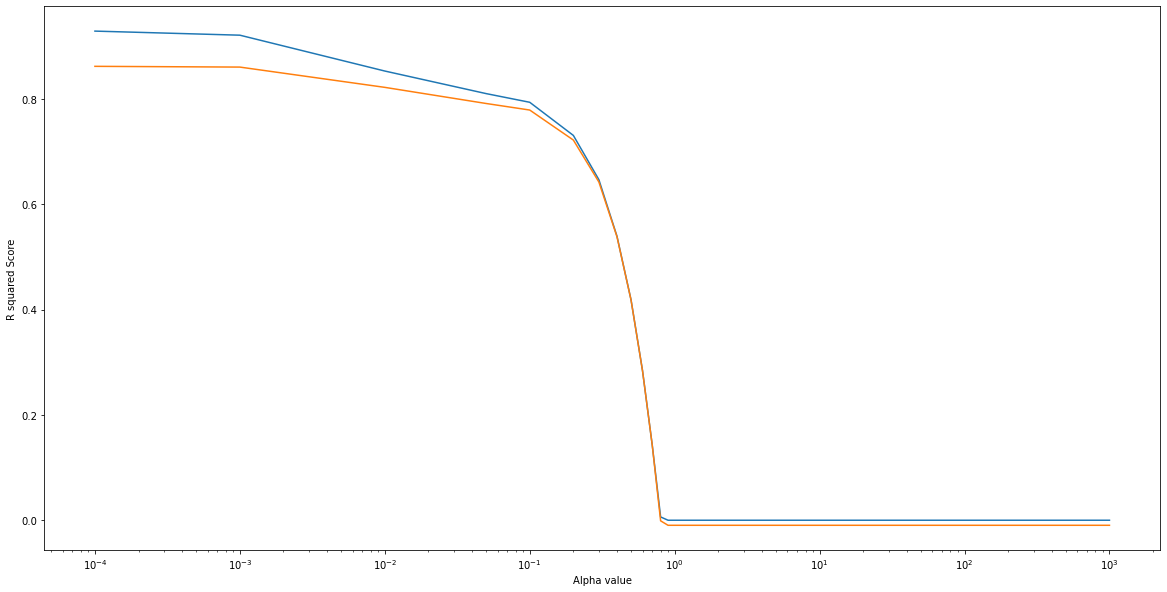

In [86]:
# Plot various alpha values & corresponding r squared values for train & test scores
# After alpha value of 10^-4 i.e. = 0.0001, the r squared scores start diminishing. 
plt.figure(figsize=(20,10))
plt.plot(cv_result_A['param_alpha'],cv_result_A['mean_train_score'])
plt.plot(cv_result_A['param_alpha'],cv_result_A['mean_test_score'])
plt.ylabel('R squared Score')
plt.xlabel('Alpha value')
plt.xscale('log')
plt.show()

In [87]:
# Checking best value for alpha
model_a.best_params_

{'alpha': 0.0001}

#### Note: Best value for alpha = 0.0001

In [88]:
# r squared scores with best value of alpha (0.0001)
lasso_r = Lasso(alpha=0.0001)
lasso_r.fit(X_train,y_train)
y_train_pred = lasso_r.predict(X_train)
y_test_pred = lasso_r.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9276836216285358
0.822955707487891


In [89]:
# View coefficient values variable wise for optimum value of alpha (0.0001).  (lasso_r)
m_params = list(lasso_r.coef_)
m_params.insert(0,lasso_r.intercept_)
varcol1 = df_train.columns
varcol1.insert(0,'const')
lassodf = pd.DataFrame(list(zip(varcol1,m_params)))
lassodf.columns = ['Variable','Coefficient value']
lassodf.sort_values(by='Coefficient value',ascending=False)

,Variable,Coefficient value
48,LotConfig_FR2,1.065221
43,LandContour_HLS,0.630579
42,LotShape_Reg,0.509908
14,BsmtHalfBath,0.419807
30,MoSold,0.417513
...,...,...
89,Condition2_RRAn,-0.392740
57,Neighborhood_CollgCr,-0.401416
90,Condition2_RRNn,-0.416088
93,BldgType_Twnhs,-0.433977


#### Ridge regression

In [90]:
# Ridge regression.  Print r squared scores.  Taking 0.1 as alpha value to begin with.
# Note: The R squared score can be optimized by changing alpha value. We will do it in the next few steps.

ridge_r = Ridge(alpha=0.1)
ridge_r.fit(X_train,y_train)

y_train_pred = ridge_r.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge_r.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9280284568456786
0.8308811485555466


In [91]:
fold_r  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

modR = Ridge()
model_rg = GridSearchCV(estimator=modR, param_grid=hyper_param, scoring='r2', cv=fold_r, verbose=1, return_train_score=True)
model_rg.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [92]:
# View results as dataframe

cv_result_2 = pd.DataFrame(model_rg.cv_results_)
cv_result_2['param_alpha'] = cv_result_2['param_alpha'].astype('float32')
cv_result_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003734,0.002200,0.001856,0.000903,0.0001,{'alpha': 0.0001},0.922082,0.446292,0.914197,0.916010,...,0.929088,0.928368,0.930878,0.929910,0.930719,0.929772,0.926063,0.931134,0.929334,0.001467
1,0.004845,0.006960,0.000212,0.000636,0.0010,{'alpha': 0.001},0.922118,0.446373,0.914190,0.916024,...,0.929088,0.928368,0.930878,0.929910,0.930719,0.929772,0.926063,0.931134,0.929334,0.001467
2,0.003337,0.004492,0.002720,0.003541,0.0100,{'alpha': 0.01},0.922461,0.447129,0.914116,0.916146,...,0.929083,0.928362,0.930871,0.929904,0.930714,0.929766,0.926058,0.931129,0.929328,0.001467
3,0.003108,0.001525,0.001431,0.000940,0.0500,{'alpha': 0.05},0.923781,0.449563,0.913834,0.916460,...,0.928971,0.928236,0.930722,0.929765,0.930603,0.929650,0.925943,0.931016,0.929212,0.001465
4,0.005311,0.004397,0.002220,0.003048,0.1000,{'alpha': 0.1},0.925081,0.451345,0.913559,0.916567,...,0.928685,0.927926,0.930353,0.929425,0.930317,0.929365,0.925650,0.930727,0.928924,0.001461


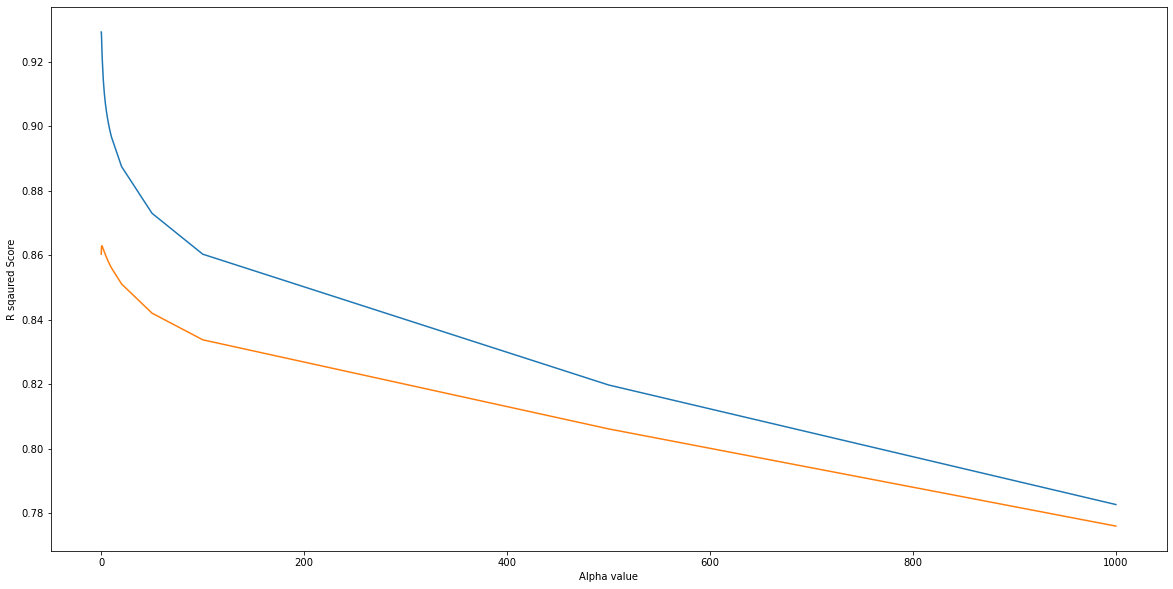

In [94]:
# Plot r squared values against various values of alpha

plt.figure(figsize=(20,10))
plt.plot(cv_result_2['param_alpha'],cv_result_2['mean_train_score'])
plt.plot(cv_result_2['param_alpha'],cv_result_2['mean_test_score'])
plt.xlabel('Alpha value')
plt.ylabel('R sqaured Score')
plt.show()

In [105]:
# Check the best value for alpha
model_rg.best_params_

{'alpha': 0.5}

#### Note: Best value for alpha = 0.5

In [106]:
ridge_besta = Ridge(alpha = 0.5)
ridge_besta.fit(X_train,y_train)

y_pred_train = ridge_besta.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge_besta.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9242607095451041
0.8540061507930531


In [107]:
# View coefficient values variable wise for best alpha value (0.5)
m_params_r = list(ridge_besta.coef_)
m_params_r.insert(0,ridge_besta.intercept_)
col_m = df_train.columns
col_m.insert(0,'constant')
ridgedf = pd.DataFrame(list(zip(col_m,m_params_r)))
ridgedf.columns = ['Variable','Coefficient value']
ridgedf.sort_values(by='Coefficient value',ascending=False)

,Variable,Coefficient value
48,LotConfig_FR2,1.035325
30,MoSold,0.446635
43,LandContour_HLS,0.435145
14,BsmtHalfBath,0.407055
25,EnclosedPorch,0.380384
...,...,...
46,Utilities_NoSeWa,-0.339165
60,Neighborhood_Gilbert,-0.343895
62,Neighborhood_MeadowV,-0.350350
57,Neighborhood_CollgCr,-0.362722


#### For assignment answer purpose:

In [78]:
# 1. Lasso regression.  Optimum alpha value found to be 0.0001

# R squared scores with alpha = 0.0001 

#Train: 0.9276836216285358
#Test 0.822955707487891

# If we double the alpha value, the scores will be:
# Train: 0.9264019238306473
# Test: 0.8254168021556487
# Code:


lasso_rd = Lasso(alpha=0.0002)
lasso_rd.fit(X_train,y_train)
y_train_pred = lasso_rd.predict(X_train)
y_test_pred = lasso_rd.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9264019238306473
0.8254168021556487


In [103]:
# 2. Ridge regression.  Optimum alpha value found to be 0.5

# R squared scores with alpha = 0.5 

# Train: 0.9242607095451041
# Test: 0.8540061507930531

# If we double the alpha value (1), the scores will be:
# Train: 0.9197869691086553
# Test: 0.8641671717762796
# Code:

ridge_bestad = Ridge(alpha = 1)
ridge_bestad.fit(X_train,y_train)

y_pred_train = ridge_bestad.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge_bestad.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9197869691086553
0.8641671717762796


In [80]:
# View coefficient values variable wise for double the optimum value of alpha (0.0002).  (Lasso)
m_paramsd = list(lasso_rd.coef_)
m_paramsd.insert(0,lasso_rd.intercept_)
varcol2 = df_train.columns
varcol2.insert(0,'const')
lassodf = pd.DataFrame(list(zip(varcol2,m_paramsd)))
lassodf.columns = ['Variable','Coefficient value']
lassodf.sort_values(by='Coefficient value',ascending=False)

,Variable,Coefficient value
48,LotConfig_FR2,1.070432
30,MoSold,0.413054
43,LandContour_HLS,0.397454
25,EnclosedPorch,0.367173
14,BsmtHalfBath,0.323126
...,...,...
56,Neighborhood_ClearCr,-0.340638
62,Neighborhood_MeadowV,-0.340778
57,Neighborhood_CollgCr,-0.393850
46,Utilities_NoSeWa,-0.397538


In [108]:
# View coefficient values variable wise for double the optimum alpha value (1).  (Ridge)

m_params_rd = list(ridge_bestad.coef_)
m_params_rd.insert(0,ridge_bestad.intercept_)
col_md = df_train.columns
col_md.insert(0,'constant')
ridgedfd = pd.DataFrame(list(zip(col_md,m_params_rd)))
ridgedfd.columns = ['Variable','Coefficient value']
ridgedfd.sort_values(by='Coefficient value',ascending=False)

,Variable,Coefficient value
48,LotConfig_FR2,0.968523
30,MoSold,0.452255
25,EnclosedPorch,0.376201
14,BsmtHalfBath,0.348239
31,AgeYearBuilt,0.323998
...,...,...
46,Utilities_NoSeWa,-0.324581
57,Neighborhood_CollgCr,-0.339544
60,Neighborhood_Gilbert,-0.342199
62,Neighborhood_MeadowV,-0.349162


In [1]:
## End of file.  Thank you.